# Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

## load data function

In [2]:
def load_data(file_pairs,src_dir='',dst_dir='.'):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    for file_pair in file_pairs:
        src = os.path.abspath(os.path.expanduser(os.path.join(src_dir,file_pair[0])))
        dst = os.path.expanduser(os.path.join(dst_dir,file_pair[1]))
        if os.path.isfile(dst):
            os.remove(dst)
        if not os.path.islink(dst):
            os.symlink(src,dst)

def load_data_suffixes(file_pairs, src_dir='', dst_dir='.', suffixes=None):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    if not suffixes:
        for file_pair in file_pairs:
            src = os.path.abspath(os.path.expanduser(os.path.join(src_dir, file_pair[0])))
            dst = os.path.expanduser(os.path.join(dst_dir, file_pair[1]))
            if os.path.isfile(dst):
                os.remove(dst)
            if not os.path.islink(dst):
                os.symlink(src, dst)
    else:
        for file_pair in file_pairs:
            for suffix_pair in suffixes:
                src = os.path.abspath(os.path.expanduser(
                    os.path.join(src_dir, file_pair[0] + suffix_pair[0])))
                dst = os.path.expanduser(
                    os.path.join(dst_dir, file_pair[1] + suffix_pair[1]))
                if os.path.isfile(dst):
                    os.remove(dst)
                if not os.path.islink(dst):
                    os.symlink(src, dst)

## make_Ramp

In [5]:
from colour import Color
from matplotlib.colors import LinearSegmentedColormap
def make_Ramp( ramp_colors ): 
    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp

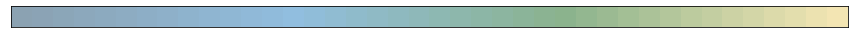

In [6]:
my_cmap_4 = make_Ramp(['#8BA2B2', '#91BEDF', '#8BB38D', '#F4E6B3'])

## venn 4 equal area

In [7]:
from venn import generate_petal_labels, draw_venn, generate_colors
def peak_overlap_venn4_equal_area(peak1,
                       peak2,
                       peak3,
                       peak4,
                       label1='A',
                       label2='B',
                       label3='C',
                       label4='D',
                       col4='#92B2CB',
                       col3='#6F7B88',
                       col2='#8DA58E',
                       col1='#E2DBC2',
                       title=None,
                       output_file=None): 
    import subprocess
    
    a = int(
        subprocess.check_output(
            f'wc -l {peak1}'.split()).decode().strip().split()[0])
    b = int(
        subprocess.check_output(
            f'wc -l {peak2}'.split()).decode().strip().split()[0])
    c = int(
        subprocess.check_output(
            f'wc -l {peak3}'.split()).decode().strip().split()[0])
    d = int(
        subprocess.check_output(
            f'wc -l {peak4}'.split()).decode().strip().split()[0])    
    ab = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak2} | wc -l',
            shell=True).decode().strip())
    ba = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak1} | wc -l',
            shell=True).decode().strip())
    ac = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak3} | wc -l',
            shell=True).decode().strip())
    ca = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak1} | wc -l',
            shell=True).decode().strip())
    ad = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak4} | wc -l',
            shell=True).decode().strip())
    da = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak4} -b {peak1} | wc -l',
            shell=True).decode().strip())    
    bc = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak3} | wc -l',
            shell=True).decode().strip())
    cb = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak2} | wc -l',
            shell=True).decode().strip())
    bd = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak4} | wc -l',
            shell=True).decode().strip())
    db = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak4} -b {peak2} | wc -l',
            shell=True).decode().strip())
    cd = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak4} | wc -l',
            shell=True).decode().strip())
    dc = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak4} -b {peak3} | wc -l',
            shell=True).decode().strip())
    
    abc = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak2} | intersectBed -u -a - -b {peak3} | wc -l',
            shell=True).decode().strip())
    bca = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak3} | intersectBed -u -a - -b {peak1} | wc -l',
            shell=True).decode().strip())
    cab = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak1} | intersectBed -u -a - -b {peak2} | wc -l',
            shell=True).decode().strip())
    abd = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak2} | intersectBed -u -a - -b {peak4} | wc -l',
            shell=True).decode().strip())
    bda = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak4} | intersectBed -u -a - -b {peak1} | wc -l',
            shell=True).decode().strip())
    dab = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak4} -b {peak1} | intersectBed -u -a - -b {peak2} | wc -l',
            shell=True).decode().strip())    
    acd = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak3} | intersectBed -u -a - -b {peak4} | wc -l',
            shell=True).decode().strip())
    cda = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak4} | intersectBed -u -a - -b {peak1} | wc -l',
            shell=True).decode().strip())
    dac = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak4} -b {peak1} | intersectBed -u -a - -b {peak3} | wc -l',
            shell=True).decode().strip())   
    bcd = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak3} | intersectBed -u -a - -b {peak4} | wc -l',
            shell=True).decode().strip())
    cdb = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak4} | intersectBed -u -a - -b {peak2} | wc -l',
            shell=True).decode().strip())
    dbc = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak4} -b {peak2} | intersectBed -u -a - -b {peak3} | wc -l',
            shell=True).decode().strip())
    
    abcd = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak2} | intersectBed -u -a - -b {peak3} | intersectBed -u -a - -b {peak4} | wc -l',
            shell=True).decode().strip())
    bcda = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak3} | intersectBed -u -a - -b {peak4} | intersectBed -u -a - -b {peak1} | wc -l',
            shell=True).decode().strip())
    cdab = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak4} | intersectBed -u -a - -b {peak1} | intersectBed -u -a - -b {peak2} | wc -l',
            shell=True).decode().strip())
    dabc = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak4} -b {peak1} | intersectBed -u -a - -b {peak2} | intersectBed -u -a - -b {peak3} | wc -l',
            shell=True).decode().strip())
    
    
    intersect_ab = (ab + ba) >> 1
    intersect_ac = (ac + ca) >> 1
    intersect_ad = (ad + da) >> 1
    intersect_bc = (bc + cb) >> 1
    intersect_bd = (bd + db) >> 1
    intersect_cd = (cd + dc) >> 1

    intersect_abc = (abc + bca + cab) // 3
    intersect_abd = (abd + bda + dab) // 3
    intersect_acd = (acd + cda + dac) // 3
    intersect_bcd = (bcd + cdb + dbc) // 3
    
    intersect_abcd = (abcd + bcda + cdab + dabc) // 4
    
    fig, ax = plt.subplots(tight_layout = True, figsize=(6, 6))
    draw_venn(petal_labels={'1000':a-intersect_ab-intersect_ac-intersect_ad+intersect_abc+intersect_abd+intersect_acd-intersect_abcd, 
                            '0100':b-intersect_ab-intersect_bc-intersect_bd+intersect_abc+intersect_abd+intersect_bcd-intersect_abcd, 
                            '0010':c-intersect_ac-intersect_bc-intersect_cd+intersect_abc+intersect_acd+intersect_bcd-intersect_abcd, 
                            '0001':d-intersect_ad-intersect_bd-intersect_cd+intersect_abd+intersect_acd+intersect_bcd-intersect_abcd,
                            '1100':intersect_ab-intersect_abc-intersect_abd+intersect_abcd, 
                            '1010':intersect_ac-intersect_abc-intersect_acd+intersect_abcd, 
                            '1001':intersect_ad-intersect_abd-intersect_acd+intersect_abcd,
                            '0110':intersect_bc-intersect_abc-intersect_bcd+intersect_abcd, 
                            '0101':intersect_bd-intersect_abd-intersect_bcd+intersect_abcd, 
                            '0011':intersect_cd-intersect_acd-intersect_bcd+intersect_abcd,
                            '1110':intersect_abc-intersect_abcd, 
                            '1101':intersect_abd-intersect_abcd, 
                            '1011':intersect_acd-intersect_abcd, 
                            '0111':intersect_bcd-intersect_abcd,
                            '1111':intersect_abcd}, 
              dataset_labels=[label1, label2, label3, label4], 
              hint_hidden=False,
              colors=generate_colors(cmap=my_cmap_4, n_colors=4, alpha=0.65),
              figsize=(6, 6), fontsize=12, legend_loc="best", ax=ax)
    ax.set_title(title)

    if output_file:
        fig.savefig(output_file, transparent=True)
    


## box plot

In [8]:
from seaborn.categorical import _BoxPlotter


class box_plotter(_BoxPlotter):
    def add_statistic_annotate(self, ax, x1, x2, y, h, value, text_type,
                               **kws):
        default_lw = mpl.rcParams["patch.linewidth"]
        lw = kws.get("linewidth", kws.get("lw", default_lw))
        width = x2 - x1
#         x1, x2 = x1 + .1 * width, x2 - .1 * width
#         x1, x2 = x1 + .5, x2 - .5
        ax.plot([x1, x1, x2, x2], [y + .5 * h, y + h, y + h, y + .5 * h],
                lw=1.5,
                c='k')
        if text_type == 'raw':
            ax.text((x1 + x2) * .5,
                    y + h * 1.5,
                    f'P = {value:.2e}',
                    ha='center',
                    va='bottom',
                    color='k')
        elif value >= 0.05:
            ax.text((x1 + x2) * .5,
                    y + h * 1.5,
                    'n.s.',
                    ha='center',
                    va='bottom',
                    color='k')
        elif value >= 0.01:
            ax.text((x1 + x2) * .5,
                    y + h * 1.5,
                    '*',
                    ha='center',
                    va='bottom',
                    color='k')
        elif value >= 0.001:
            ax.text((x1 + x2) * .5,
                    y_ + h * 1.5,
                    '**',
                    ha='center',
                    va='bottom',
                    color='k')
        else:
            ax.text((x1 + x2) * .5,
                    y + h * 1.5,
                    '***',
                    ha='center',
                    va='bottom',
                    color='k')

    def draw_statistic_annotate(self, ax, centerCol, **kwargs):
        from operator import methodcaller
        from scipy import stats
        if kwargs.get('statistic_test') == 'mannwhitneyu':
            statistic_kwargs = {
                'use_continuity': kwargs.get('use_continuity', True),
                'alternative': kwargs.get('alternative', None)
            }
        elif kwargs.get('statistic_test') == 'wilcoxon':
            statistic_kwargs = {
                'zero_method': kwargs.get('zero_method', 'wilcox'),
                'correction': kwargs.get('correction', False),
                'alternative': kwargs.get('alternative', 'two-sided')
            }
        elif kwargs.get('statistic_test') == 'ttest_ind':
            statistic_kwargs = {
                'axis': kwargs.get('axis', 0),
                'equal_var': kwargs.get('equal_var', True),
                'nan_policy': kwargs.get('nan_policy', 'propagate')
            }
        elif kwargs.get('statistic_test') == 'ttest_rel':
            statistic_kwargs = {
                'axis': kwargs.get('axis', 0),
                'nan_policy': kwargs.get('nan_policy', 'propagate')
            }
        else:
            raise ValueError(
                'statistic_test must be either mannwhitneyu, wilcoxon, ttest_ind or ttest_rel.'
            )
        ylim = ax.get_ylim()
        h = .05 * (ylim[1] - ylim[0])
#         print(self.plot_hues)
        if self.plot_hues is None:
            if centerCol == None :
                for i in range(len(self.plot_data) - 1):
                    pvalue = methodcaller(kwargs.get('statistic_test'),
                                          self.plot_data[i], self.plot_data[i + 1],
                                          **statistic_kwargs)(stats).pvalue
                    y = max(
                        mpl.cbook.boxplot_stats(self.plot_data[i])[0]['whishi'],
                        mpl.cbook.boxplot_stats(
                            self.plot_data[i + 1])[0]['whishi']) + .25 * h
                    self.add_statistic_annotate(ax,
                                                i,
                                                i + 1,
                                                y,
                                                h,
                                                pvalue,
                                                text_type=kwargs.get(
                                                    'text_type', 'raw'))
            else :
                for i in range(len(self.plot_data)):
                    if i != centerCol :
                        pvalue = methodcaller(kwargs.get('statistic_test'),
                                              self.plot_data[i], self.plot_data[centerCol],
                                              **statistic_kwargs)(stats).pvalue
                        y = max(
                            mpl.cbook.boxplot_stats(self.plot_data[i])[0]['whishi'],
                            mpl.cbook.boxplot_stats(
                                self.plot_data[centerCol])[0]['whishi']) + 2 * h * i
                        self.add_statistic_annotate(ax,
                                                    i,
                                                    centerCol,
                                                    y,
                                                    h,
                                                    pvalue,
                                                    text_type=kwargs.get(
                                                        'text_type', 'raw'))
                    
        else:
            for i in range(len(self.plot_data)):
                offsets = self.hue_offsets
                for j in range(len(self.hue_names) - 1):
                    pvalue = methodcaller(
                        kwargs.get('statistic_test'), self.plot_data[i][
                            self.plot_hues[i] == self.hue_names[j]],
                        self.plot_data[i][self.plot_hues[i] == self.hue_names[
                            j + 1]], **statistic_kwargs)(stats).pvalue
                    y = max(
                        mpl.cbook.boxplot_stats(
                            self.plot_data[i][self.plot_hues[i] ==
                                              self.hue_names[j]])[0]['whishi'],
                        mpl.cbook.boxplot_stats(self.plot_data[i][
                            self.plot_hues[i] == self.hue_names[j + 1]])[0]
                        ['whishi']) + .25 * h
                    self.add_statistic_annotate(ax,
                                                i + offsets[j],
                                                i + offsets[j + 1],
                                                y,
                                                h,
                                                pvalue,
                                                text_type=kwargs.get(
                                                    'text_type', 'raw'))
    
        ax.set_ylim(ylim[0], ylim[1] + 2.5 * h)


def boxplot(x=None,
            y=None,
            hue=None,
            data=None,
            order=None,
            hue_order=None,
            orient=None,
            color=None,
            palette=None,
            saturation=0.75,
            width=0.8,
            dodge=True,
            fliersize=5,
            linewidth=None,
            whis=1.5,
            ax=None,
            statistic_args=None,
            centerCol=None,
            **kwargs):
    plotter = box_plotter(x, y, hue, data, order, hue_order, orient, color,
                          palette, saturation, width, dodge, fliersize,
                          linewidth)
    if ax is None:
        ax = plt.gca()
    kwargs.update(dict(whis=whis))
    plotter.draw_boxplot(ax, kwargs)
    plotter.annotate_axes(ax)
    if statistic_args:
        kwargs = statistic_args
        plotter.draw_statistic_annotate(ax, centerCol, **kwargs)
    if plotter.orient == "h":
        ax.invert_yaxis()

# Load data

In [48]:
import subprocess
import os
os.chdir("/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison")
# load samples
samples = [
    'ATF1_1e5', 'ATF1_1e4', 'ATF1_5e3', 
    'ELF1_1e5', 'ELF1_1e4', 'ELF1_5e3',
    'ATF1_FlagCR_1e5', 'ATF1_FlagCR_5e3', 'ATF1_wtCR_1e5',
    'ELF1_FlagCR_1e5', 'ELF1_FlagCR_5e3', 'ELF1_wtCR_1e5'
]

for sample in samples:
    file_pairs = [
        [f'{sample}_excludeIgG_filtered_peaks.narrowPeak', f'{sample}_excludeIgG_filtered_peaks.narrowPeak'],
    ]
    load_data_suffixes(file_pairs, src_dir='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/sampling_down', dst_dir='.')
    

In [129]:
import subprocess
import os
os.chdir("/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison/reduceInput_corr")
# load samples
samples = [
    'ATF1_1e5', 'ATF1_1e4', 'ATF1_5e3', 
    'ELF1_1e5', 'ELF1_1e4', 'ELF1_5e3',
    'ATF1_FlagCR_1e5', 'ATF1_FlagCR_5e3', 'ATF1_wtCR_1e5',
    'ELF1_FlagCR_1e5', 'ELF1_FlagCR_5e3', 'ELF1_wtCR_1e5'
]

for sample in samples:
    file_pairs = [
        [f'{sample}.bw', f'{sample}.bw'],
    ]
    load_data_suffixes(file_pairs, src_dir='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/sampling_down/before_filter', dst_dir='.')    

In [208]:
import subprocess
import os
os.chdir("/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison/specificPeak_enrichment_3plot")
# load samples
samples = [
    'ATF1_FlagCR_1e5', 
    'ATF1_wtCR_1e5',
    'ELF1_FlagCR_1e5', 
    'ELF1_wtCR_1e5'
]

for sample in samples:
    file_pairs = [
        [f'{sample}.bw', f'{sample}.bw'],
    ]
    load_data_suffixes(file_pairs, src_dir='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/sampling_down/before_filter', dst_dir='.')    

In [130]:
import subprocess
import os
os.chdir("/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison")
samples = [
    'ATF1_ChIP',
    'ELF1_ChIP',
]

for sample in samples:
    file_pairs = [
        [f'{sample}_filtered_peaks.narrowPeak', f'{sample}_filtered_peaks.narrowPeak'],
    ]
    load_data_suffixes(file_pairs, src_dir='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/sampling_down', dst_dir='.')

In [207]:
import subprocess
import os
os.chdir("/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison/specificPeak_enrichment_3plot")
samples = [
    'ATF1_ChIP',
    'ELF1_ChIP',
]

for sample in samples:
    file_pairs = [
        [f'{sample}.bw', f'{sample}.bw'],
    ]
    load_data_suffixes(file_pairs, src_dir='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/sampling_down/before_filter', dst_dir='.')

# FitCR v.s. ChIP-seq v.s. flagCR v.s. CR

## venn -- Fig.S1F

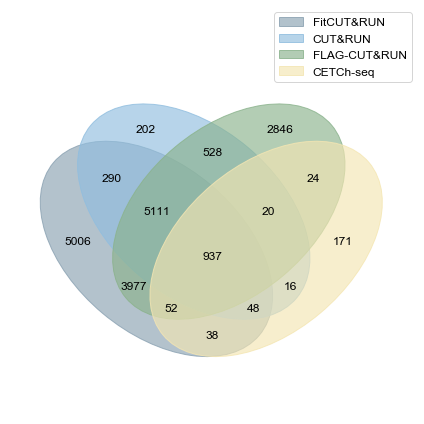

In [15]:
import os
os.chdir("/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison")
peak_overlap_venn4_equal_area('ATF1_1e5_excludeIgG_filtered_peaks.narrowPeak',
                   'ATF1_wtCR_1e5_excludeIgG_filtered_peaks.narrowPeak',
                   'ATF1_FlagCR_1e5_excludeIgG_filtered_peaks.narrowPeak',
                   'ATF1_ChIP_filtered_peaks.narrowPeak',
                   label1='FitCUT&RUN',
                   label2='CUT&RUN',
                   label3='FLAG-CUT&RUN',
                   label4='CETCh-seq',                   
                   output_file='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Supple_Fig1F_Venn4_ATF1.pdf')

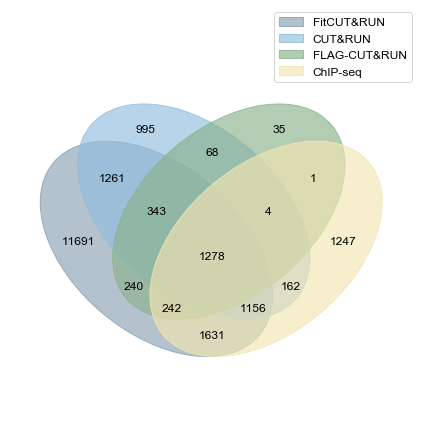

In [17]:
peak_overlap_venn4_equal_area('ELF1_1e5_excludeIgG_filtered_peaks.narrowPeak',
                              'ELF1_wtCR_1e5_excludeIgG_filtered_peaks.narrowPeak',
                              'ELF1_FlagCR_1e5_excludeIgG_filtered_peaks.narrowPeak',
                              'ELF1_ChIP_filtered_peaks.narrowPeak',
                              label1='FitCUT&RUN',
                              label2='CUT&RUN',
                              label3='FLAG-CUT&RUN',
                              label4='ChIP-seq',                   
                              output_file='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Fig1D_Venn4_ELF1.pdf')

## 3 plot fitCR specific peaks (ChIP-seq CR flagCR signal)

In [18]:
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/comparison/specificPeak_enrichment_3plot')

### specific peak

In [19]:
%%bash

intersectBed -v -a ../ATF1_1e5_excludeIgG_filtered_peaks.narrowPeak -b ../ATF1_FlagCR_1e5_excludeIgG_filtered_peaks.narrowPeak > ATF1_FitCR_diff_FlagCR.bed
intersectBed -v -a ../ELF1_1e5_excludeIgG_filtered_peaks.narrowPeak -b ../ELF1_FlagCR_1e5_excludeIgG_filtered_peaks.narrowPeak > ELF1_FitCR_diff_FlagCR.bed

intersectBed -v -a ../ATF1_1e5_excludeIgG_filtered_peaks.narrowPeak -b ../ATF1_wtCR_1e5_excludeIgG_filtered_peaks.narrowPeak > ATF1_FitCR_diff_wtCR.bed
intersectBed -v -a ../ELF1_1e5_excludeIgG_filtered_peaks.narrowPeak -b ../ELF1_wtCR_1e5_excludeIgG_filtered_peaks.narrowPeak > ELF1_FitCR_diff_wtCR.bed

intersectBed -v -a ../ATF1_1e5_excludeIgG_filtered_peaks.narrowPeak -b ../ATF1_ChIP_filtered_peaks.narrowPeak > ATF1_FitCR_diff_ChIP.bed
intersectBed -v -a ../ELF1_1e5_excludeIgG_filtered_peaks.narrowPeak -b ../ELF1_ChIP_filtered_peaks.narrowPeak > ELF1_FitCR_diff_ChIP.bed


In [20]:
%%bash

for factor in ATF1 ELF1;do
    for tech in FlagCR wtCR ChIP;do
        n=`wc -l ${factor}_FitCR_diff_${tech}.bed | awk '{print $1}'`
        echo $n
        randomBed -l 1 -n ${n} -g ~/source/bySpecies/hg38/chromSizes/hg38_main.chrom.sizes > ${factor}_${tech}_control_1bp.bed
    done
done


5341
9098
14388
15745
13819
13437


In [21]:
ATF1_FlagCR_control = pd.read_csv('ATF1_FlagCR_control_1bp.bed',sep='\t',header=None)
ELF1_FlagCR_control = pd.read_csv('ELF1_FlagCR_control_1bp.bed',sep='\t',header=None)

ATF1_wtCR_control = pd.read_csv('ATF1_wtCR_control_1bp.bed',sep='\t',header=None)
ELF1_wtCR_control = pd.read_csv('ELF1_wtCR_control_1bp.bed',sep='\t',header=None)

ATF1_ChIP_control = pd.read_csv('ATF1_ChIP_control_1bp.bed',sep='\t',header=None)
ELF1_ChIP_control = pd.read_csv('ELF1_ChIP_control_1bp.bed',sep='\t',header=None)

ATF1_FlagCR = pd.read_csv('ATF1_FitCR_diff_FlagCR.bed',sep='\t',header=None)
ELF1_FlagCR = pd.read_csv('ELF1_FitCR_diff_FlagCR.bed',sep='\t',header=None)

ATF1_wtCR = pd.read_csv('ATF1_FitCR_diff_wtCR.bed',sep='\t',header=None)
ELF1_wtCR = pd.read_csv('ELF1_FitCR_diff_wtCR.bed',sep='\t',header=None)

ATF1_ChIP = pd.read_csv('ATF1_FitCR_diff_ChIP.bed',sep='\t',header=None)
ELF1_ChIP = pd.read_csv('ELF1_FitCR_diff_ChIP.bed',sep='\t',header=None)


In [22]:
with open('ATF1_FlagCR_control.bed', 'w') as fhd:
    for (index1, row1), (index2, row2) in zip(ATF1_FlagCR_control.iterrows(), ATF1_FlagCR.iterrows()):
        length = (row2[2] - row2[1]) >> 1
        fhd.write(f'{row1[0]}\t{row1[1]-length:d}\t{row1[1]+length:d}\t{row1[3]}\n')

with open('ELF1_FlagCR_control.bed', 'w') as fhd:
    for (index1, row1), (index2, row2) in zip(ELF1_FlagCR_control.iterrows(), ELF1_FlagCR.iterrows()):
        length = (row2[2] - row2[1]) >> 1
        fhd.write(f'{row1[0]}\t{row1[1]-length:d}\t{row1[1]+length:d}\t{row1[3]}\n')

In [23]:
with open('ATF1_wtCR_control.bed', 'w') as fhd:
    for (index1, row1), (index2, row2) in zip(ATF1_wtCR_control.iterrows(), ATF1_wtCR.iterrows()):
        length = (row2[2] - row2[1]) >> 1
        fhd.write(f'{row1[0]}\t{row1[1]-length:d}\t{row1[1]+length:d}\t{row1[3]}\n')

with open('ELF1_wtCR_control.bed', 'w') as fhd:
    for (index1, row1), (index2, row2) in zip(ELF1_wtCR_control.iterrows(), ELF1_wtCR.iterrows()):
        length = (row2[2] - row2[1]) >> 1
        fhd.write(f'{row1[0]}\t{row1[1]-length:d}\t{row1[1]+length:d}\t{row1[3]}\n')

In [24]:
with open('ATF1_ChIP_control.bed', 'w') as fhd:
    for (index1, row1), (index2, row2) in zip(ATF1_ChIP_control.iterrows(), ATF1_ChIP.iterrows()):
        length = (row2[2] - row2[1]) >> 1
        fhd.write(f'{row1[0]}\t{row1[1]-length:d}\t{row1[1]+length:d}\t{row1[3]}\n')

with open('ELF1_ChIP_control.bed', 'w') as fhd:
    for (index1, row1), (index2, row2) in zip(ELF1_ChIP_control.iterrows(), ELF1_ChIP.iterrows()):
        length = (row2[2] - row2[1]) >> 1
        fhd.write(f'{row1[0]}\t{row1[1]-length:d}\t{row1[1]+length:d}\t{row1[3]}\n')

### bw scan

In [25]:
bw_scan = True

import subprocess


def get_bigwig_mean(bigwig_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bigwig_file} | grep mean',
                                   shell=True).decode()
    fold = float(fold.split()[1])
    return fold

signal_dict_fitCR = {}
for factor in ['ATF1', 'ELF1']:
    for sample in ['FitCR_diff_FlagCR', 'FitCR_diff_wtCR', 'FitCR_diff_ChIP', 'FlagCR_control', 'wtCR_control', 'ChIP_control']:
        sample_short = sample.split('_')[0] if sample.endswith('_control') else sample.split('_')[-1]
        name = f'{factor}_{sample}'
        capture_regions_file = f'{factor}_{sample}.bed'
        bigwig_files = [f'{factor}_{sample_short}.bw'] if sample_short == 'ChIP' else [f'{factor}_{sample_short}_1e5.bw']
        labels = [sample_short]

        cmd = f'cut -f 1-4 {capture_regions_file} > captures_regions.bed'
        subprocess.call(cmd, shell=True)
        for label, bigwig_file in zip(labels, bigwig_files):
            bw_scan_cmd = f'bigWigAverageOverBed {bigwig_file} captures_regions.bed {name}_{label}_signal.tsv'
            if bw_scan:
                print(subprocess.check_output(bw_scan_cmd.split()).decode(), end='')
        capture_regions = pd.read_csv('captures_regions.bed', sep='\t', header=None)
        capture_signal = pd.DataFrame(index=capture_regions[3].to_list())
        for label, bigwig_file in zip(labels, bigwig_files):
            avg = get_bigwig_mean(bigwig_file)
            capture_signal[label] = pd.read_csv(
                f'{name}_{label}_signal.tsv',
                sep='\t',
                header=None,
                index_col=0,
                names=['size', 'covered', 'sum', 'mean0', 'mean'])['mean0'] / avg
        capture_signal.head()
        signal_dict_fitCR[f'{factor}_{sample}_signal'] = capture_signal

In [26]:
signal_dict_fitCR.keys()

dict_keys(['ATF1_FitCR_diff_FlagCR_signal', 'ATF1_FitCR_diff_wtCR_signal', 'ATF1_FitCR_diff_ChIP_signal', 'ATF1_FlagCR_control_signal', 'ATF1_wtCR_control_signal', 'ATF1_ChIP_control_signal', 'ELF1_FitCR_diff_FlagCR_signal', 'ELF1_FitCR_diff_wtCR_signal', 'ELF1_FitCR_diff_ChIP_signal', 'ELF1_FlagCR_control_signal', 'ELF1_wtCR_control_signal', 'ELF1_ChIP_control_signal'])

In [27]:
signal_dict_fitCR['ATF1_FitCR_diff_FlagCR_signal'].head()

,FlagCR
ATF1_1e5_peak_1,22.250813
ATF1_1e5_peak_4,19.255860
ATF1_1e5_peak_10,23.883392
ATF1_1e5_peak_12,61.246630
ATF1_1e5_peak_18,38.793877


### box plot -- Fig.1E S1G

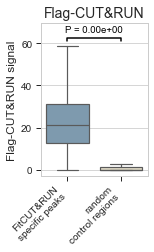

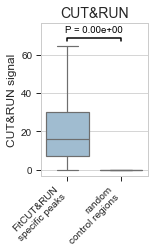

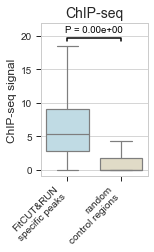

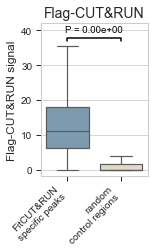

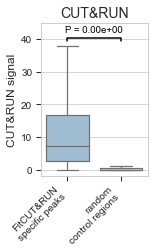

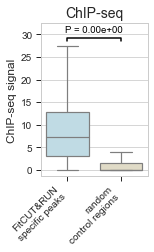

In [28]:

for factor in ['ATF1', 'ELF1'] :
    i = 0
    for tech in ['FlagCR', 'wtCR', 'ChIP'] :
        colors = ['#769BB6', '#98BDD8', '#BADEEA']
        labels = ['Flag-CUT&RUN', 'CUT&RUN', 'ChIP-seq']
        specific_signal = pd.DataFrame({
            'signal':
            np.concatenate((signal_dict_fitCR[f'{factor}_FitCR_diff_{tech}_signal'][tech].values,
                            signal_dict_fitCR[f'{factor}_{tech}_control_signal'][tech].values,
                           ),
                          ),
            'class':
            ['FitCUT&RUN\nspecific peaks'] * signal_dict_fitCR[f'{factor}_FitCR_diff_{tech}_signal'].shape[0] +
            ['random\ncontrol regions'] * signal_dict_fitCR[f'{factor}_{tech}_control_signal'].shape[0],
        })
        with sns.axes_style('whitegrid', rc={
                'xtick.bottom': True,
                'ytick.left': True
        }), sns.plotting_context('paper',
                                 rc={
                                     'axes.titlesize': 14,
                                     'axes.labelsize': 12,
                                     'xtick.labelsize': 10,
                                     'ytick.labelsize': 10,
                                     'legend.fontsize': 10
                                 }):
            fig, ax = plt.subplots(figsize=(6.4 * .35, 4.8 * .75))
            boxplot(
                x='class',
                y='signal',
                data=specific_signal,
                showfliers=False,
                ax=ax,
                palette=[colors[i], '#E4DDC3'],
                statistic_args={
                    'statistic_test': 'mannwhitneyu',
                    'use_continuity': False,
                },
            )
            ax.set_title(labels[i])
            ax.set_xlabel(None)
            ax.set_ylabel(f'{labels[i]} signal')
            ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')
            fig.tight_layout()
            fig_name = 'Supple_Fig1G' if factor == 'ATF1' else 'Fig1E'
            fig.savefig(f'/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/{fig_name}_boxplot_{tech}_{factor}.pdf', transparent=True)
            i += 1